In [34]:
import numpy as np
from matplotlib import pyplot as plt

## Gradescope 

Gradescope Autograder will launch your Jupyter Notebook executing all coding cells top to bottom, and then it will compare values of certain variables marked as ##==GRADED==## to what's in our solution file. 

So, before submitting: 

1. Make sure your code executes correctly top-to-bottom. You can check it by doing "Kernel -> Restart" and then "Cell -> Run All".
2. Make sure you kept the original names of ##==GRADED==## variables. Gradescope will look for your variables **by their name**, so if you rename those graded variables then Gradescope will assign you 0 points for these, even if you implemented everything else right.


If you see a block of code like this:

In [35]:
##==GRADED==##
A1 = ...

It means that the variable `A1` will be graded, so you need to assign the requested value to this variable and to keep its as it is (`A1`). The mark ##==GRADED==## does not signal anything to Gradescope, it is only there to attract your attention. 

## Bisection Method

Most coding homeworks for 515 will include tasks of implementing an algorithm according to its pseudocode which will be provided during lectures or in books. As an exercise, in this homework we'll implement a simple root-finding method called Bisection method.

Suppose we want to find a root of a function $f(x)$:

In [36]:
f = lambda x: x**2 - 2*x - 3   # We define our polynomial using using Python's lambda-functions. 

# Read this if you're unfamiliar with lambda-functions:

# https://realpython.com/python-lambda/

which looks like this:

Text(0, 0.5, '$f(x)$')

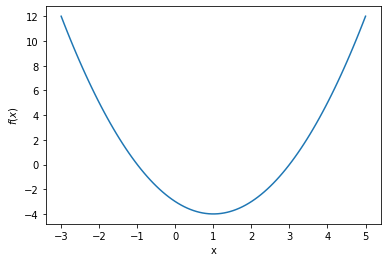

In [37]:
xspan = np.linspace(-3, 5, 100)  # Create a 100 uniformly spaced points between -3 and 5.
plt.plot(xspan, f(xspan))        # Plot the function as plot(x, y)
plt.xlabel("x")                  # Label axes
plt.ylabel(r"$f(x)$")            # That's how you render LaTeX in plots titles and labels: r"$<formula goes here>$"

# Here is a good tutorial if you never used matplotlib before:

# https://matplotlib.org/tutorials/introductory/pyplot.html

Now let's create a function `bisection`, which takes a function `f` and the bounds `a` and `b`, and returns a root of `f` between `a` and `b`. This time we'll take pseudocode from Wikipedia (https://en.wikipedia.org/wiki/Bisection_method).

In [38]:
# TODO: Finish implementing this function accorting to Wikipedia pseudocode

def bisection(f,                # Function the root of which we're trying to find
              a,                # Left boundary for the root
              b,                # Right boundary for the root
              tol = 1e-4,       # Tolerance 
              nmax = 1000):     # Maximal number of iterations 
    n = 1
    while n <= nmax:
        c = (a+b)/2             # Choose a middle point
        if abs(f(c)) <= tol :        # If stopping condition is satisfied
            return c            # Return the root
        n = n + 1
        if np.sign(f(a)) == np.sign(f(c)) :                # Choose how to update the search inverval
            a = c
        else:
            b = c
    print("Method failed")      # Happens only if the method reached nmax iterations without finding a root

From the plot it seems like there are two roots: one is between -2 and 1, and another one is between 1 and 5. Save these two roots into the variables `x0` and `x1` respectively (done for you as an example):

In [39]:
##===GRADED===##
x0 = bisection(f, -2, 1)

##===GRADED===##
x1 = bisection(f, 1, 5)

It's important to check that your values are correct. For instance, we can check that `x0` and `x1` are the if `f(x0)` and `f(x1)` are pretty close to 0. 

In [40]:
print(f"f(x0) = {f(x0):.5f}. Should be close to 0")
print(f"f(x1) = {f(x1):.5f}. Should be close to 0")

# P.S. if you're unfamiliar Python strings formatting in general or
# with f-strings in particular, here is an instruction:

# http://zetcode.com/python/fstring/

f(x0) = 0.00006. Should be close to 0
f(x1) = 0.00000. Should be close to 0


Since we're using numerical methods, we will almost never get our answers precisely. However, coding numerical methods is a bit like taming black magic: when they are implemented right they give very accurate values, but when there is a typo (even a small one) they tend to explode with very large quantities. Hence the goal of making these checks is to ensure that the values are at least sensical. For instance, if you know that the target value is supposed to be a small positive value, but you got -2123124156.3847594 -- it indicates a mistake in the algorithm and so more debugging is needed.

## NumPy

NumPy is a Python library and a very popular choice when one needs to work with linear algebra objects like matrices and vectors. We will be using numpy throughout the class.

In [41]:
import numpy as np

If you have never used NumPy then I would highly recommend you going through this tutorial first:

https://numpy.org/doc/stable/user/quickstart.html

I also wanted to use this homework to remind you about the importance of dimensions in NumPy. For instance, suppose I have two matrices:

In [42]:
A = np.array([
    [1, 2],
    [3, 4], 
    [5, 6]
])

B = 2*np.eye(3)

If we try to multiply them as-is we will get an error:

This error tells us that matrix dimensions don't match: the number of columns of A is 2, but the number of rows of B is 3, so the matrices can't be multiplied. 

It gets less obvious when it comes to vectors, mainly because NumPy vectors are one-dimensional objects of shape (N,) which is different from column vectors -- 2-d matrices of shape (N, 1) -- or row-vectors -- 2-d matrices of shape (1, N). This difference may seem natural to people with background in C or Java (1d vs 2d arrays), but might seem counter-intuitive for people with MATLAB background, where all vectors and matrices are 2d by default. 

Here, `u` is a row-vector, so when I try doing an outer product everything goes as a mathematician would expect:

In [ ]:
u = np.array([[1, 2, 3]])
print(f"Shape of u is: {u.shape}")
u.T.dot(u)

However, `v` is a 1d-array, and so the behavior of .dot() is different: instead of an outer product we get an inner product.

In [ ]:
v = np.array([1, 2, 3])
print(f"Shape of v is: {v.shape}")
v.T.dot(v)

I would recommend sticking to 2d matrices (to column vectors and row vectors instead of arrays) whenever you do linear algebra operations.

Please make sure you familiarized yourself with numpy enough to see what I am doing differently in four very similar code snippets below to get four different outcomes. This understanding might save you hours of debugging in future. 

In [ ]:
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])
u.dot(v)

In [ ]:
u = np.array([[1, 2, 3]])
v = np.array([[4, 5, 6]])
u*v

In [ ]:
u = np.array([[1, 2, 3]]).T
v = np.array([[4, 5, 6]])
u.dot(v)

As a basic NumPy proficiency test on translating math expression to NumPy syntax, calculate the following expression: 

$C = \log\det(B^Tvv^TB + B^TB*B^TB)$

Where $B = (1, 2; 3, 4; 5, 6)$, $v$ is a vector of ones, and $*$ is an element-wise product. Use NumPy functions for the logarithm (`np.log`) and determinant (`np.linalg.det`) 

In [ ]:
v = np.array([[1,1,1]]).T

B = np.array([[1,2],[3,4],[5,6]])

innerds = B.T.dot(v).dot(v.T).dot(B)+B.T.dot(B)*B.T.dot(B)

##===GRADED===##
C = np.log(np.linalg.det(innerds))

## Submitting your work to Gradescope

You need to submit this Jupyter Notebook to Gradescope. There is no limit for the number of attempts this time. 


Gradescope will give you 0 points if your any of your code cells fail, so **please don't forget to delete all my code cells which produce errors**. Those were for illustration purposes.